In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
ls

Untitled.ipynb
Untitled1.ipynb
backup_pythonrtranslate.R
clean_quality_inr.csv
new_rf_order_quality_df.csv
order_train.csv
prelimEDA.ipynb
product_df.csv
python_to_R_translate.R
quality_df.csv
quality_featureimportance_randomforest_pre_cleaning.R
randomforest_featureimportance_qualityorder.ipynb
rf_order_quality_df.csv
user_df.csv
users_and_orders.csv
users_and_orders2.csv


In [3]:
uao_df = pd.read_csv("users_and_orders.csv")
print('size of uao_df:', uao_df.shape)

size of uao_df: (201050, 15)


In [4]:
uao_df.head()

,pv,pv_index_loan,pv_apply_total,pv_ask,pv_calculator,order_count_loan,pv_daikuan,pv_credit,pv_search_daikuan,pv_detail_daikuan,date.x,date.y,term,limit,result
0,1,0,0,0,0,0,1,0,0,0,547,1525,12,10.0,0
1,23,0,0,0,0,0,0,23,0,0,547,1504,12,3.0,0
2,8,0,0,0,2,0,8,0,0,1,547,1503,30,140.0,0
3,1,0,0,0,0,0,1,0,0,0,547,1451,36,3.5,0
4,1,0,0,0,0,0,1,0,0,0,547,1454,36,4.0,1


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
randomForest = RandomForestClassifier()

In [6]:
uao_df.iloc[:, 14]

0         0
1         0
2         0
3         0
4         1
         ..
201045    0
201046    0
201047    0
201048    1
201049    0
Name: result, Length: 201050, dtype: int64

In [7]:
uao_df.iloc[:, 0:14]

,pv,pv_index_loan,pv_apply_total,pv_ask,pv_calculator,order_count_loan,pv_daikuan,pv_credit,pv_search_daikuan,pv_detail_daikuan,date.x,date.y,term,limit
0,1,0,0,0,0,0,1,0,0,0,547,1525,12,10.0
1,23,0,0,0,0,0,0,23,0,0,547,1504,12,3.0
2,8,0,0,0,2,0,8,0,0,1,547,1503,30,140.0
3,1,0,0,0,0,0,1,0,0,0,547,1451,36,3.5
4,1,0,0,0,0,0,1,0,0,0,547,1454,36,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201045,1,0,0,0,0,0,1,0,1,0,52,1169,12,5.0
201046,3,0,0,0,0,0,3,0,3,0,52,1157,12,10.0
201047,2,0,0,0,0,0,2,0,2,0,52,1157,36,11.0
201048,1,0,0,0,0,0,1,0,0,0,52,1164,24,20.0


In [8]:
ou_data = uao_df.iloc[:, 0:14]
ou_target = uao_df.iloc[:, 14]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(ou_data, ou_target, test_size=0.2, random_state=0)

In [12]:
randomForest.set_params(random_state=0)

%time randomForest.fit(X_train, y_train) 
    
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

CPU times: user 20.8 s, sys: 376 ms, total: 21.2 s
Wall time: 21.7 s
The training error is: 0.00754
The test     error is: 0.17625


In [14]:
feature_importance = list(zip(ou_data.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')#[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'pv_calcula', b'order_coun', b'pv_ask', b'pv_index_l', b'pv_apply_t']

(b'pv_calcula', b'order_coun', b'pv_ask', b'pv_index_l', b'pv_apply_t', b'pv_credit', b'term', b'pv_detail_', b'pv_search_', b'pv_daikuan', b'pv', b'limit', b'date.x', b'date.y')
(0.003942173041834621, 0.019476441463539135, 0.024781625557759104, 0.02959703590896422, 0.03188876937028909, 0.03253147190392119, 0.041422047904078524, 0.04955041235135369, 0.06895765907399973, 0.07199001825771434, 0.07524652876521717, 0.10420702635565059, 0.21055716599072366, 0.235851624054955)


<BarContainer object of 14 artists>

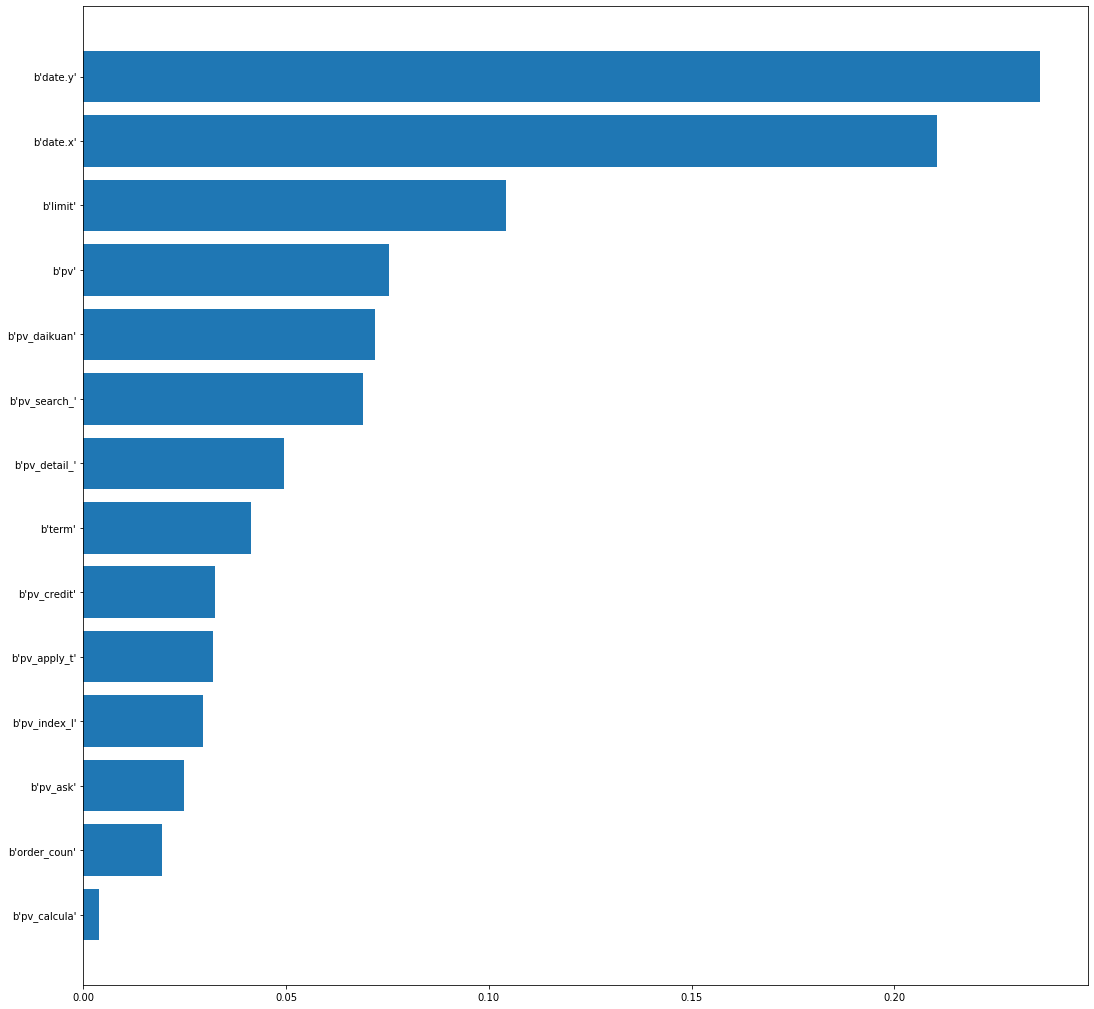

In [15]:
featureNames, featureScores = zip(*list(feature_sort))
print(featureNames)
print(featureScores)
plt.figure(figsize=(18,18))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)

In [ ]:
# now gridsearch random forest to find the best parameters and get feature importance

In [16]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [17]:
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 29.4 s, sys: 6.15 s, total: 35.5 s
Wall time: 2h 41min 30s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [18]:
grid_search_forest.best_params_

{'criterion': 'gini', 'max_depth': 21, 'n_estimators': 60}

In [19]:
grid_search_forest.best_score_

0.8248445660283512

In [20]:
print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The training error is: 0.14149
The test     error is: 0.17155


In [21]:
forest_final = grid_search_forest.best_estimator_
feature_importance = list(zip(ou_data.columns[1:], forest_final.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype = dtype)
feature_sort = np.sort(feature_importance, order='importance')#[::-1]

# The [::-1] above reverses the order of the list from ascending sort to descending




feature_sort

array([(b'order_coun', 0.00635041), (b'pv_daikuan', 0.02432621),
       (b'pv_calcula', 0.02935697), (b'pv_apply_t', 0.03274405),
       (b'pv_ask', 0.03607093), (b'pv_search_', 0.04183758),
       (b'limit', 0.05573988), (b'date.x', 0.05655591),
       (b'pv_detail_', 0.06959157), (b'pv_credit', 0.07767097),
       (b'pv_index_l', 0.0811502 ), (b'date.y', 0.16175106),
       (b'term', 0.20461151)],
      dtype=[('feature', 'S10'), ('importance', '<f8')])

(b'order_coun', b'pv_daikuan', b'pv_calcula', b'pv_apply_t', b'pv_ask', b'pv_search_', b'limit', b'date.x', b'pv_detail_', b'pv_credit', b'pv_index_l', b'date.y', b'term')
(0.006350413133598617, 0.0243262130871924, 0.02935697072718126, 0.03274404607856275, 0.0360709338830386, 0.04183757758825753, 0.05573987545298546, 0.05655591107432777, 0.06959157483365341, 0.07767097255991096, 0.0811502029270926, 0.1617510580988461, 0.2046115071345285)


<BarContainer object of 13 artists>

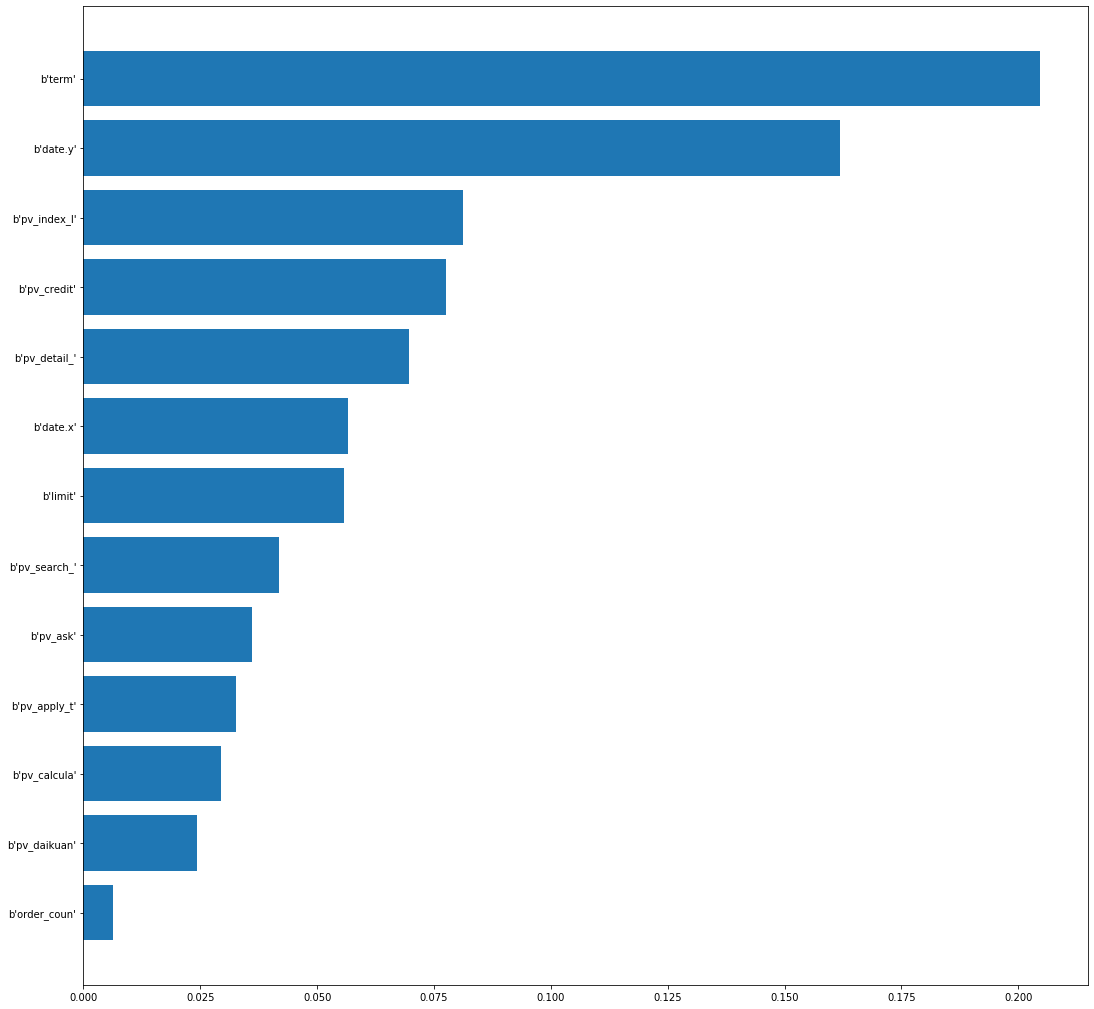

In [22]:
featureNames, featureScores = zip(*list(feature_sort))
print(featureNames)
print(featureScores)
plt.figure(figsize=(18,18))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)